In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [4]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)


In [7]:
X_train ,X_test , y_train , y_test = train_test_split( X , y , test_size = 0.3 , random_state = 27 )
print(pd.DataFrame(X))

           0         1         2         3         4         5         6   \
0   -0.258203  1.019808  1.524563  0.617243  0.148243  0.744111 -0.363963   
1   -0.458166  0.828728 -0.656965 -0.056297  0.254895 -0.018241  0.313829   
2   -0.387378  0.761818 -1.310351 -0.351663 -0.130643 -0.641420  0.152001   
3   -2.394585 -0.036724  1.361228 -0.371470  1.871835 -1.226815  0.770733   
4    0.258229 -1.600952  1.101282  1.659578  0.927923 -0.093182 -1.778309   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.724879  0.281545 -0.362035 -2.602418  0.699501 -0.328376  0.383521   
996  2.085897  0.461640  0.372497 -1.838814  0.024923 -0.710831 -0.945424   
997 -0.547793 -0.674539 -0.834644  1.050191 -0.797763  0.699879 -0.943583   
998  0.559619 -0.625025  1.404538  0.593826 -0.270234 -0.519678 -1.407141   
999 -1.424876  0.527146  0.157864 -0.926648 -0.801353  1.825411  0.999557   

           7         8         9         10        11        12        13  

In [9]:
pd.DataFrame(y)

,0
0,1
1,1
2,1
3,0
4,0
...,...
995,1
996,0
997,1
998,0


In [12]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
# logistic regression 
model1= LogisticRegression()
#  KNN 
model2 = KNeighborsClassifier( n_neighbors= 4) 


model1.fit( X_train , y_train)
model2.fit( X_train , y_train)

pred_prob1 = model1.predict_proba( X_test) 
pred_prob2 = model2.predict_proba( X_test) 

In [13]:
from sklearn.metrics   import roc_curve 
fpr1 , tpr1 , thresh1 = roc_curve( y_test , pred_prob1[:,1 ], pos_label= 1 )
fpr2 , tpr2 , thresh2 = roc_curve( y_test , pred_prob2[:,1 ], pos_label= 1 )
random_prob = [ 0 for i in range( len( y_test))]
p_fpr , p_tpr  , _ = roc_curve(y_test , random_prob  ,pos_label =1  )



In [15]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score( y_test  , pred_prob1[: , 1 ] ) 
auc_score2 = roc_auc_score( y_test  , pred_prob2[: , 1 ] ) 
auc_score1 , auc_score2

(np.float64(0.9762374461979914), np.float64(0.9233769727403157))

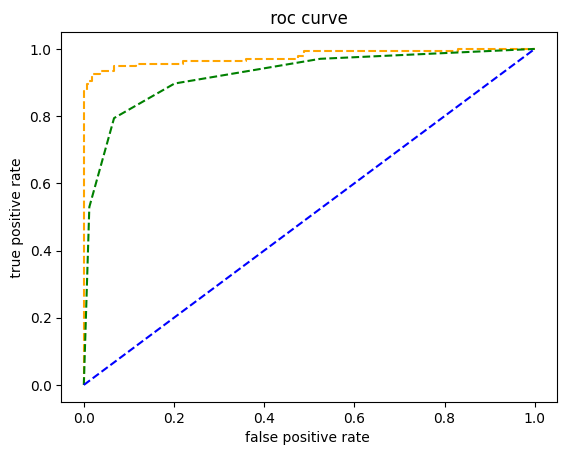

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.plot( fpr1 , tpr1 , linestyle  = '--' ,   color ='orange'  , label = "logistic regression " )
plt.plot( fpr2 , tpr2 , linestyle  = '--' ,   color ='green'  , label = "KNN" )
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title( " roc curve ")
plt.xlabel( 'false positive rate ')
plt.ylabel( ' true positive rate ')
plt.show()
